# Continuing... 6.1.4 Generate Random Latitudes and Longitudes
#### (This notebook is created near bottom of lesson page....)

### Create Latitude and Longitude Combinations:

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(62.592333409250955, -66.50360019958902),
 (-83.66914335807922, 101.4065431470483),
 (-76.36060621453792, -110.03236803966372),
 (2.7720995548946235, -109.45197300922788),
 (61.666121758800045, -94.47242790434683),
 (-54.267475529465564, -99.8944419271439),
 (4.870038652093029, -89.39032165519012),
 (12.894342486667384, -36.45149490153091),
 (53.33015271681441, 122.93835516627047),
 (-9.256147556551483, -127.03245098929838),
 (8.250433542339238, 154.8320410599926),
 (-62.45983802590288, -11.34724299536694),
 (-76.188158042296, 138.96829739115304),
 (-61.52494708273524, 26.096849430097905),
 (-10.29279596268212, 128.74660190436168),
 (72.77633312942129, -86.4256029446959),
 (21.424528131201143, 110.05867973537096),
 (76.05559535119204, -138.2610989194627),
 (-41.93829235351358, 11.559324342873708),
 (24.345280905106677, 93.90229115247826),
 (-50.270308577037476, 65.72454802062373),
 (-53.8577094827236, 32.497195937184216),
 (-23.328210813781567, -153.66307785803835),
 (-10.371513242474

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

# 6.2.6 Get the City Weather Data

### Import Dependencies, and Initialize an Empty List and Counters

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=776679839de3e268fa527f9a6dcc6c40


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | ixtapa
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | urusha
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | kavieng
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | nguiu
City not found. Skipping...
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | suicheng
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | kakching
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | avera
Processing Re

Processing Record 36 of Set 4 | comodoro rivadavia
Processing Record 37 of Set 4 | roseburg
Processing Record 38 of Set 4 | bukachacha
Processing Record 39 of Set 4 | inuvik
Processing Record 40 of Set 4 | kaitangata
Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | tabora
Processing Record 44 of Set 4 | marystown
Processing Record 45 of Set 4 | pitimbu
Processing Record 46 of Set 4 | ingham
Processing Record 47 of Set 4 | belvedere marittimo
Processing Record 48 of Set 4 | taltal
Processing Record 49 of Set 4 | safford
Processing Record 50 of Set 4 | lebyazhye
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | micheweni
Processing Record 3 of Set 5 | boa vista
Processing Record 4 of Set 5 | camacha
Processing Record 5 of Set 5 | ayan
Processing Record 6 of Set 5 | asau
Processing Record 7 of Set 5 | andenes
Processing Record 8 of Set 5 | belmonte
Processing Record 9 of Set 5 | ribeira grande
Pr

Processing Record 28 of Set 8 | minatitlan
Processing Record 29 of Set 8 | bintulu
Processing Record 30 of Set 8 | biak
Processing Record 31 of Set 8 | ercis
Processing Record 32 of Set 8 | aksarka
Processing Record 33 of Set 8 | zhanakorgan
Processing Record 34 of Set 8 | high prairie
Processing Record 35 of Set 8 | viedma
Processing Record 36 of Set 8 | halifax
Processing Record 37 of Set 8 | dera ghazi khan
Processing Record 38 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 39 of Set 8 | cabinda
Processing Record 40 of Set 8 | puerto baquerizo moreno
Processing Record 41 of Set 8 | krasnoselkup
Processing Record 42 of Set 8 | beira
Processing Record 43 of Set 8 | huarmey
Processing Record 44 of Set 8 | kollam
Processing Record 45 of Set 8 | san rafael
Processing Record 46 of Set 8 | korla
Processing Record 47 of Set 8 | takab
Processing Record 48 of Set 8 | samusu
City not found. Skipping...
Processing Record 49 of Set 8 | vila do maio
Processing Record 50 of Set

Processing Record 16 of Set 12 | kalabo
Processing Record 17 of Set 12 | asfi
Processing Record 18 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 19 of Set 12 | mundi
Processing Record 20 of Set 12 | hantsport
Processing Record 21 of Set 12 | boras
Processing Record 22 of Set 12 | semnan
Processing Record 23 of Set 12 | goure
Processing Record 24 of Set 12 | san ramon
Processing Record 25 of Set 12 | praya
Processing Record 26 of Set 12 | bandarbeyla
Processing Record 27 of Set 12 | nandura
Processing Record 28 of Set 12 | abancay
Processing Record 29 of Set 12 | kerrobert
Processing Record 30 of Set 12 | kuopio
Processing Record 31 of Set 12 | nyanguge
Processing Record 32 of Set 12 | marsa matruh
Processing Record 33 of Set 12 | urumqi
Processing Record 34 of Set 12 | tobetsu
Processing Record 35 of Set 12 | kot khai
Processing Record 36 of Set 12 | ketchikan
Processing Record 37 of Set 12 | stara zagora
Processing Record 38 of Set 12 | hamilton
Processing Recor

# 6.2.7 Create a DataFrame of City Weather Data

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.75,-68.51,35.60,88,90,13.87,CA,2020-10-15 00:09:54
1,Albany,42.60,-73.97,54.00,77,4,4.61,US,2020-10-15 00:09:07
2,Punta Arenas,-53.15,-70.92,48.20,57,75,11.41,CL,2020-10-15 00:08:27
3,Ixtapa,20.70,-105.20,87.80,70,20,8.05,MX,2020-10-15 00:09:54
4,Thompson,55.74,-97.86,32.00,94,75,14.99,CA,2020-10-15 00:09:54
5,Castro,-24.79,-50.01,66.67,84,100,3.47,BR,2020-10-15 00:09:54
6,Puerto Ayora,-0.74,-90.35,68.00,96,82,3.00,EC,2020-10-15 00:09:54
7,Sao Filipe,14.90,-24.50,80.47,79,76,5.93,CV,2020-10-15 00:09:54
8,Urusha,54.05,122.90,25.14,85,41,4.79,RU,2020-10-15 00:09:54
9,Atuona,-9.80,-139.03,77.94,75,16,19.69,PF,2020-10-15 00:09:54


In [10]:
#Now reorder the columns as:  City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iqaluit,CA,2020-10-15 00:09:54,63.75,-68.51,35.60,88,90,13.87
1,Albany,US,2020-10-15 00:09:07,42.60,-73.97,54.00,77,4,4.61
2,Punta Arenas,CL,2020-10-15 00:08:27,-53.15,-70.92,48.20,57,75,11.41
3,Ixtapa,MX,2020-10-15 00:09:54,20.70,-105.20,87.80,70,20,8.05
4,Thompson,CA,2020-10-15 00:09:54,55.74,-97.86,32.00,94,75,14.99
5,Castro,BR,2020-10-15 00:09:54,-24.79,-50.01,66.67,84,100,3.47
6,Puerto Ayora,EC,2020-10-15 00:09:54,-0.74,-90.35,68.00,96,82,3.00
7,Sao Filipe,CV,2020-10-15 00:09:54,14.90,-24.50,80.47,79,76,5.93
8,Urusha,RU,2020-10-15 00:09:54,54.05,122.90,25.14,85,41,4.79
9,Atuona,PF,2020-10-15 00:09:54,-9.80,-139.03,77.94,75,16,19.69


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs Temperature

### Get Data for Plotting

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
import time

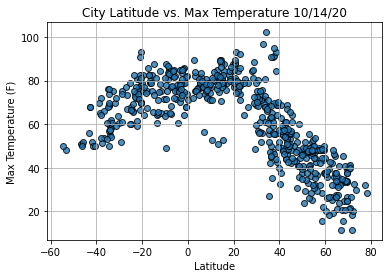

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs Humidity

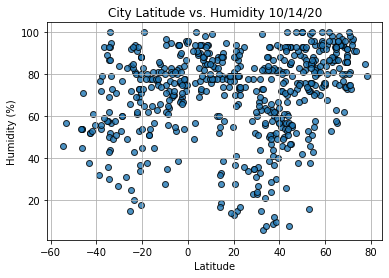

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


# 6.3.3 Plot Latitude vs Cloudiness

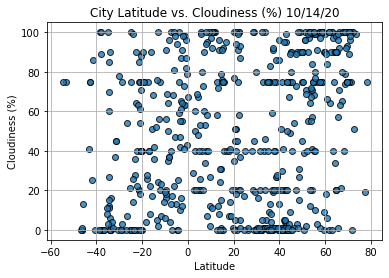

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs Wind Speed

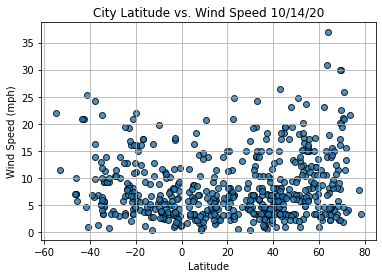

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()